In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv("movies.csv")
ratings =pd.read_csv("ratings.csv")

In [3]:
ratings.head(20)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [4]:
movies.head(20)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
ratings['movieId'].nunique()

9724

In [6]:
movies['movieId'].nunique()

9742

In [7]:
inner_merged_df=pd.merge(movies,ratings,on='movieId')

In [8]:
inner_merged_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


## Q1) Which movies has the highest average ratings

In [9]:
inner_merged_df['rating'].agg('mean')

np.float64(3.501556983616962)

In [10]:
inner_merged_df.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [11]:
avg_ratings=inner_merged_df.groupby('movieId')['rating'].mean()

In [12]:
avg_ratings

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [13]:
new_merge_df=pd.merge(avg_ratings,movies,on="movieId")

In [14]:
top_movies=new_merge_df.sort_values(by='rating',ascending=False)

In [15]:
top_movies

,movieId,rating,title,genres
9693,187717,5.0,Won't You Be My Neighbor? (2018),Documentary
4667,6983,5.0,Jane Eyre (1944),Drama|Romance
3802,5328,5.0,Rain (2001),Drama|Romance
7927,95843,5.0,Goodbye Charlie (1964),Comedy|Fantasy|Romance
2934,3941,5.0,Sorority House Massacre (1986),Horror
...,...,...,...,...
4009,5672,0.5,Pokemon 4 Ever (a.k.a. Pokémon 4: The Movie) (...,Adventure|Animation|Children|Fantasy
6514,54274,0.5,I Know Who Killed Me (2007),Crime|Drama|Thriller
9675,184641,0.5,Fullmetal Alchemist 2018 (2017),Action|Adventure|Fantasy
8210,104017,0.5,3 dev adam (Three Giant Men) (1973),Action|Adventure|Sci-Fi


## Q2) Which user has rated most movies and what is his/her avg rating?
### A2) userId=414 and avg=3.39

In [16]:
ratings.head(20)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [18]:
ratings['userId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [30]:
ratings['userId'].value_counts().sort_values(ascending=False)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
147      20
278      20
442      20
320      20
53       20
Name: count, Length: 610, dtype: int64

In [42]:
filt = (ratings['userId'] == 414)
ratings.loc[filt,['rating']].mean()

rating    3.391957
dtype: float64

## Q3) Most Common Movie Genres
### A3) Drama

In [37]:
movies.head(20)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [39]:
movies['genres'].value_counts()

genres
Drama                                        1053
Comedy                                        946
Comedy|Drama                                  435
Comedy|Romance                                363
Drama|Romance                                 349
                                             ... 
Children|Drama|Musical                          1
Adventure|Drama|Horror|Mystery|Thriller         1
Adventure|Children|Comedy|Fantasy|Mystery       1
Adventure|Animation|Children|Western            1
Comedy|Mystery|Romance|Thriller                 1
Name: count, Length: 951, dtype: int64

## Q4) Extract Year from Title

In [47]:
movies['title'].head(20)

0                          Toy Story (1995)
1                            Jumanji (1995)
2                   Grumpier Old Men (1995)
3                  Waiting to Exhale (1995)
4        Father of the Bride Part II (1995)
5                               Heat (1995)
6                            Sabrina (1995)
7                       Tom and Huck (1995)
8                       Sudden Death (1995)
9                          GoldenEye (1995)
10           American President, The (1995)
11       Dracula: Dead and Loving It (1995)
12                             Balto (1995)
13                             Nixon (1995)
14                  Cutthroat Island (1995)
15                            Casino (1995)
16             Sense and Sensibility (1995)
17                        Four Rooms (1995)
18    Ace Ventura: When Nature Calls (1995)
19                       Money Train (1995)
Name: title, dtype: object

In [53]:
import re
movies['title'].str.extract(r'(\d{4})')

,0
0,1995
1,1995
2,1995
3,1995
4,1995
...,...
9737,2017
9738,2017
9739,2017
9740,2018


## Q5) Split genres and use explode and find top 5 genres

In [54]:
movies['genres'].head(20)

0     Adventure|Animation|Children|Comedy|Fantasy
1                      Adventure|Children|Fantasy
2                                  Comedy|Romance
3                            Comedy|Drama|Romance
4                                          Comedy
5                           Action|Crime|Thriller
6                                  Comedy|Romance
7                              Adventure|Children
8                                          Action
9                       Action|Adventure|Thriller
10                           Comedy|Drama|Romance
11                                  Comedy|Horror
12                   Adventure|Animation|Children
13                                          Drama
14                       Action|Adventure|Romance
15                                    Crime|Drama
16                                  Drama|Romance
17                                         Comedy
18                                         Comedy
19             Action|Comedy|Crime|Drama|Thriller


In [60]:
movies['genres']=movies['genres'].str.split('|')

In [69]:
new_merged_df=pd.merge(movies,ratings)

In [70]:
new_merged_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483


In [71]:
new_merged_df=new_merged_df.explode('genres')

In [72]:
new_merged_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure,1,4.0,964982703
0,1,Toy Story (1995),Animation,1,4.0,964982703
0,1,Toy Story (1995),Children,1,4.0,964982703
0,1,Toy Story (1995),Comedy,1,4.0,964982703
0,1,Toy Story (1995),Fantasy,1,4.0,964982703


In [76]:
filte= (new_merged_df['rating'] > 3.5)
genre_counts=new_merged_df.loc[filte,['genres']].value_counts()

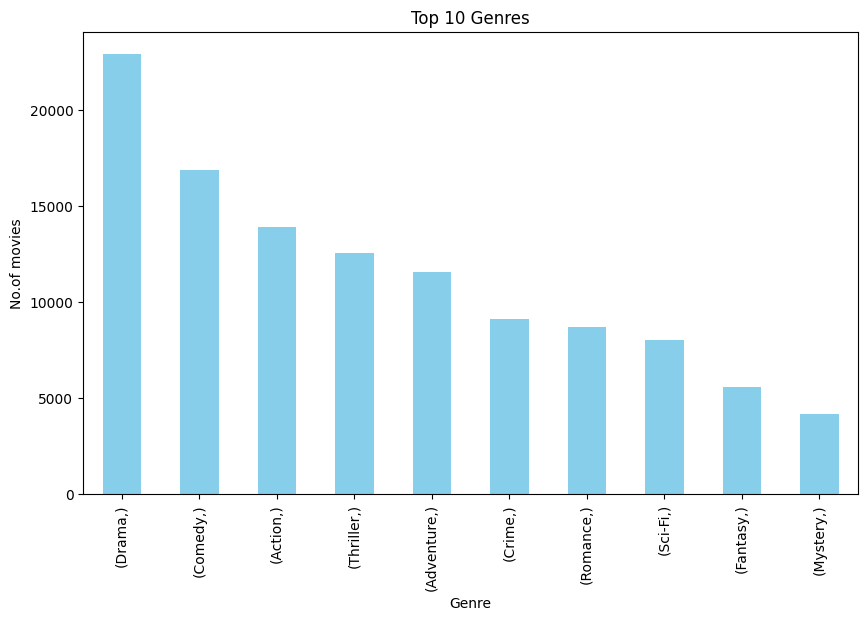

In [82]:
import matplotlib.pyplot as plt
top_10= genre_counts.head(10)

plt.figure(figsize=(10,6))
top_10.plot(color='skyblue',kind='bar')
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("No.of movies")

plt.show()